In [37]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten


In [38]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

#one hot encoding - переводит вектор результатов в набор векторов
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)



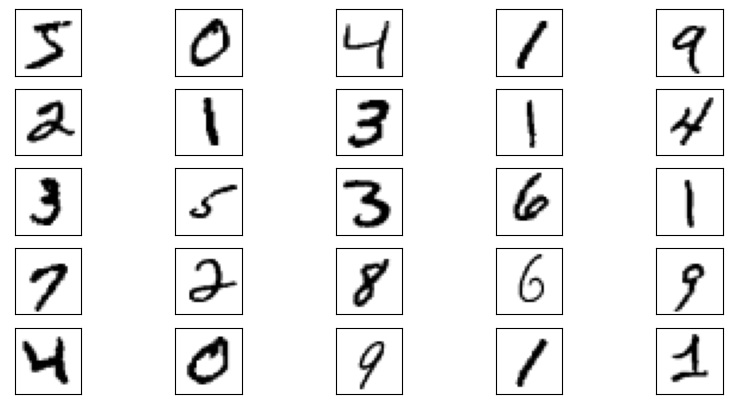

In [39]:
# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()



In [40]:
# Модель полносвязной нейронной сети
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

print(model.summary())      # вывод структуры НС в консоль



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.save("model.h5")

model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)

model.evaluate(x_test, y_test_cat)




Epoch 1/5
1500/1500 [==============================] - 8s 4ms/step - loss: 0.0403 - accuracy: 0.9874 - val_loss: 0.0881 - val_accuracy: 0.9749
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0300 - accuracy: 0.9909 - val_loss: 0.0906 - val_accuracy: 0.9742
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0240 - accuracy: 0.9926 - val_loss: 0.0943 - val_accuracy: 0.9739
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0197 - accuracy: 0.9939 - val_loss: 0.0995 - val_accuracy: 0.9737
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0842 - accuracy: 0.9775


[0.08415506780147552, 0.9775000214576721]

In [47]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


1/1 [==============================] - 0s 154ms/step
[[1.3948290e-06 3.0955555e-06 7.3568044e-05 7.5442703e-03 2.9171832e-11
  7.1605518e-07 1.6532225e-11 9.9231333e-01 3.2849210e-05 3.0771520e-05]]
7


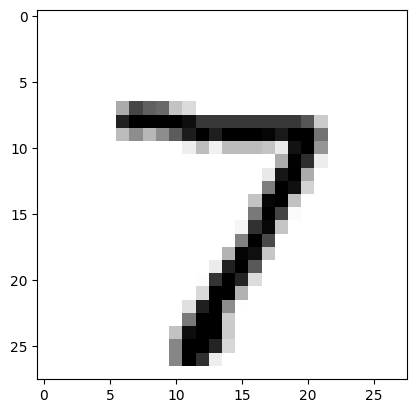

In [42]:
n = 0
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print( res )
print( np.argmax(res) )

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()


In [43]:
# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])



313/313 [==============================] - 1s 2ms/step
(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [44]:
# Выделение неверных вариантов
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
p_false = pred[~mask]

print(x_false.shape)



[ True  True  True  True  True  True  True  True  True  True]
(279, 28, 28)


9 4 8 3 2 
3 7 3 3 0 
2 3 2 8 3 
3 4 9 6 8 
9 2 9 3 9 


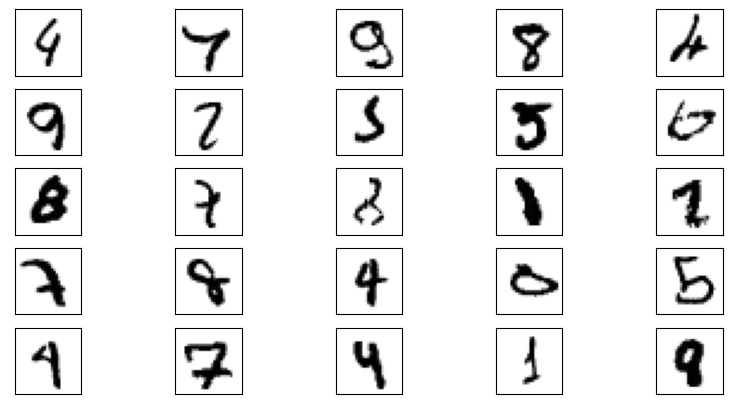

In [45]:
# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(25):
    print(str(p_false[i]), end=" ")
    if (i + 1) % 5 == 0:  # После каждых 5 чисел перенос строки
        print()
        
for i in range(25):
    # print (" "+str(p_false[i]))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()